In [1]:
# Remove model if run before
!rm -rf tflinreg

In [2]:
!head -3 assets/president_gdp.csv

term,party,growth
Truman,D,6.57
Eisenhower 1,R,2.72


Regression with `numpy`, `pandas`, and `scikit-learn`:

In [3]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('assets/president_gdp.csv')
party = data.party == 'D'
party = np.expand_dims(party, axis=1)
growth = data.growth

In [5]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model.fit(X=party, y=growth)
model.predict([[0], [1]])

array([ 2.54444444,  4.33285714])

Regression with `tensorflow`:

# high-level ML APIs... training an Estimator

In [6]:
import tensorflow as tf

party_col = tf.contrib.layers.real_valued_column(column_name='')
model = tf.contrib.learn.LinearRegressor(feature_columns=[party_col],
                                         model_dir='tflinreg')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10939c4a8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}


In [7]:
model.fit(x=party, y=growth, steps=1000)
list(model.predict_scores(np.array([[0], [1]])))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.


/Users/ruairitobrien/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Saving checkpoints for 1 into tflinreg/model.ckpt.
INFO:tensorflow:loss = 13.2432, step = 1
INFO:tensorflow:global_step/sec: 1139.03
INFO:tensorflow:loss = 1.45393, step = 101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1103.37
INFO:tensorflow:loss = 1.40094, step = 201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1177.97
INFO:tensorflow:loss = 1.39256, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1126.87
INFO:tensorflow:loss = 1.38961, step = 401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1180.61
INFO:tensorflow:loss = 1.38855, step = 501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1098.07
INFO:tensorflow:loss = 1.38817, step = 601 (0.091 sec)
INFO:tensorflow:global_step/sec: 1230.68
INFO:tensorflow:loss = 1.38804, step = 701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1127.18
INFO:tensorflow:loss = 1.38799, step = 801 (0.089 sec)
INFO:tensorflow:global_step/sec: 1206.5
INFO:tensorflow:loss = 1.38797, step = 901 (0.083 sec)
INFO:tensorflow:Saving checkp

[2.5422058, 4.3341689]

In [8]:
!tensorboard --logdir tflinreg

Starting TensorBoard b'47' at http://0.0.0.0:6006
(Press CTRL+C to quit)
^C


After startup, go to http://localhost:6006/ to see the interface.

To continue with the notebook, interrupt the kernel by using the square "stop" button or by typing esc, i, i.

---

# high-level ML APIs... pre-trained Keras

In [10]:
model = tf.contrib.keras.applications.ResNet50()

In [11]:
filename = 'assets/koala_bear.jpg'
image = tf.contrib.keras.preprocessing.image.load_img(
    filename, target_size=(224, 224))

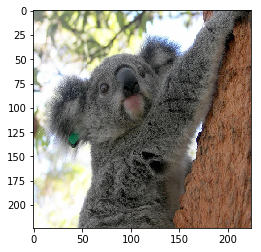

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image)

In [13]:
array = tf.contrib.keras.preprocessing.image.img_to_array(image)
array = np.expand_dims(array, axis=0)

In [14]:
probabilities = model.predict(array)

In [15]:
tf.contrib.keras.applications.resnet50.decode_predictions(probabilities)

[[('n01882714', 'koala', 0.98125219),
  ('n02497673', 'Madagascar_cat', 0.0070982664),
  ('n02123045', 'tabby', 0.0011722571),
  ('n02124075', 'Egyptian_cat', 0.0010554646),
  ('n01877812', 'wallaby', 0.00098293286)]]